# Income Dataset
# Improving the ROC Curve by handling Imbalance in Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Income Dataset/Income_preprocessed.csv')
data.head()

,Age,WorkClass,Weight,Education,EducationNumber,Occupation,Relationship,MarriageStatus,PartnerStatus,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Native Country,Salary
0,50,Self Employed,83311,Undergraduate,13,Exec-managerial,Husband,Married,Civil,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,High School,9,Handlers-cleaners,Not-in-family,Divorced,No Information,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,School,7,Handlers-cleaners,Husband,Married,Civil,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Undergraduate,13,Prof-specialty,Wife,Married,Civil,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Graduate,14,Exec-managerial,Wife,Married,Civil,White,Female,0,0,40,United-States,<=50K


In [3]:
data.describe()

,Age,Weight,EducationNumber,CapitalGain,CapitalLoss,HoursPerWeek
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32560 non-null  int64 
 1   WorkClass        32560 non-null  object
 2   Weight           32560 non-null  int64 
 3   Education        32560 non-null  object
 4   EducationNumber  32560 non-null  int64 
 5   Occupation       32560 non-null  object
 6   Relationship     32560 non-null  object
 7   MarriageStatus   32560 non-null  object
 8   PartnerStatus    32560 non-null  object
 9   Race             32560 non-null  object
 10  Sex              32560 non-null  object
 11  CapitalGain      32560 non-null  int64 
 12  CapitalLoss      32560 non-null  int64 
 13  HoursPerWeek     32560 non-null  int64 
 14  Native Country   32560 non-null  object
 15  Salary           32560 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.0+ MB


## Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [6]:
data['Education'] = encoder.fit_transform(data['Education'])
data['WorkClass'] = encoder.fit_transform(data['WorkClass'])
data['Occupation'] = encoder.fit_transform(data['Occupation'])
data['MarriageStatus'] = encoder.fit_transform(data['MarriageStatus'])
data['Relationship'] = encoder.fit_transform(data['Relationship'])
data['PartnerStatus'] = encoder.fit_transform(data['PartnerStatus'])
data['Race'] = encoder.fit_transform(data['Race'])
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Native Country'] = encoder.fit_transform(data['Native Country'])

# Target - <= 50K : 0 | >50K: 1
data['Salary'] = encoder.fit_transform(data['Salary'])

In [7]:
data['Salary'].value_counts()

0    24719
1     7841
Name: Salary, dtype: int64

The dataset is Unbalanced.

In [8]:
data.head()

,Age,WorkClass,Weight,Education,EducationNumber,Occupation,Relationship,MarriageStatus,PartnerStatus,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Native Country,Salary
0,50,3,83311,6,13,3,0,1,1,4,1,0,0,13,38,0
1,38,2,215646,3,9,5,1,0,3,4,1,0,0,40,38,0
2,53,2,234721,5,7,5,0,1,1,2,1,0,0,40,38,0
3,28,2,338409,6,13,9,5,1,1,2,0,0,0,40,4,0
4,37,2,284582,2,14,3,5,1,1,4,0,0,0,40,38,0


In [9]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Train and Test Sets

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print('Shape x_train: ', x_train.shape)
print('Shape y_train: ', y_train.shape)
print('Shape x_test: ', x_test.shape)
print('Shape y_test: ', y_test.shape)

Shape x_train:  (26048, 15)
Shape y_train:  (26048,)
Shape x_test:  (6512, 15)
Shape y_test:  (6512,)


## Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## ML Techniques

We attempt to use various ML Algorithms for classification.

In [12]:
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, 
                             roc_auc_score, roc_curve)

### k-Nearest Neighbours

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier = KNeighborsClassifier()
kNN_classifier.fit(x_train, y_train)
y_pred_kNN = kNN_classifier.predict(x_test)

In [14]:
y_pred_kNN_train = kNN_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_kNN_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_kNN))

Accuracy of the train set:  0.8797988329238329
Accuracy of the test set:  0.820485257985258


In [15]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4912
           1       0.66      0.56      0.61      1600

    accuracy                           0.82      6512
   macro avg       0.76      0.73      0.74      6512
weighted avg       0.81      0.82      0.82      6512



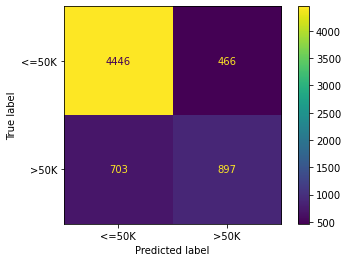

In [16]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_kNN), display_labels=['<=50K', '>50K']).plot()

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(x_train, y_train)
y_pred_NB = NB_classifier.predict(x_test)

In [18]:
y_pred_NB_train = NB_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_NB_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_NB))

Accuracy of the train set:  0.8201013513513513
Accuracy of the test set:  0.8243243243243243


In [19]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4912
           1       0.72      0.47      0.57      1600

    accuracy                           0.82      6512
   macro avg       0.78      0.70      0.73      6512
weighted avg       0.81      0.82      0.81      6512



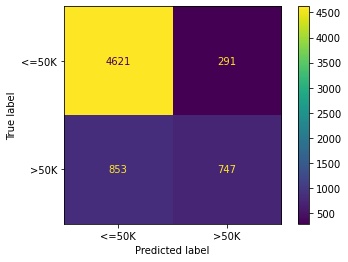

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_NB), display_labels=['<=50K', '>50K']).plot()

### Support Vector Machine

In [21]:
from sklearn.svm import SVC
SVM_classifier = SVC()
SVM_classifier.fit(x_train, y_train)
y_pred_SVM = SVM_classifier.predict(x_test)

In [22]:
y_pred_SVM_train = SVM_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_SVM_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_SVM))

Accuracy of the train set:  0.8560350122850123
Accuracy of the test set:  0.8456695331695332


In [23]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4912
           1       0.75      0.56      0.64      1600

    accuracy                           0.85      6512
   macro avg       0.81      0.75      0.77      6512
weighted avg       0.84      0.85      0.84      6512



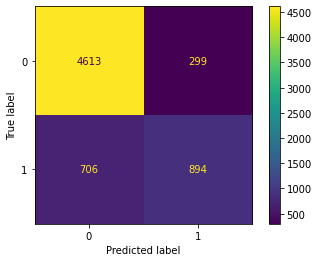

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_SVM)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(x_train, y_train)
y_pred_LR = LR_classifier.predict(x_test)

In [26]:
y_pred_LR_train = LR_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_LR_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_LR))

Accuracy of the train set:  0.8381065724815725
Accuracy of the test set:  0.8366093366093366


In [27]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4912
           1       0.71      0.56      0.63      1600

    accuracy                           0.84      6512
   macro avg       0.79      0.74      0.76      6512
weighted avg       0.83      0.84      0.83      6512



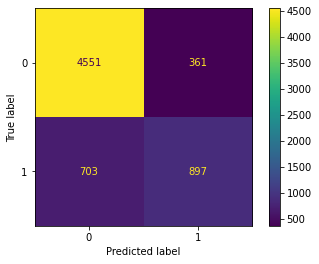

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)

### Decision Tree 

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(x_train, y_train)
y_pred_DT = DT_classifier.predict(x_test)
DT_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [30]:
y_pred_DT_train = DT_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT))

Accuracy of the train set:  0.9999616093366094
Accuracy of the test set:  0.808507371007371


There is overfitting, as evident between the huge difference between the accuracy of the training and testing datasets. 
We can use Pre-pruning technique to reduce overfitting.

#### Pre-pruning Technique for Decision Tree

We find the best values for the Hyperparameters 'max_depth', 'min_samples_leaf' and 'min_samples_split'. We will set the Cross validation to 3-fold and evaluate the Decision Tree.

In [31]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {
   "max_depth": [3, 5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 7] 
}

grid_cv = GridSearchCV(DT_classifier, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train)

In [32]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_test)))

Parameters for Grid Search:  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}
CV score for Grid Search:  0.8935650454118783
Train AUC-ROC Score for GS:  0.7960149200399137
Test AUC-ROC Score for GS:  0.7860779723127036


We use the parameters from Pre-pruning to model the Decision Tree again:

In [33]:
DT_classifier_pruned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 7, min_samples_split = 2)
DT_classifier_pruned.fit(x_train, y_train)
y_pred_DT_pruned = DT_classifier_pruned.predict(x_test)

In [34]:
y_pred_DT_pruned_train = DT_classifier_pruned.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_DT_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_DT_pruned))

Accuracy of the train set:  0.8640202702702703
Accuracy of the test set:  0.851965601965602


The overfitting problem is solved. We now do a Performance Evaluation.

In [35]:
print(classification_report(y_test, y_pred_DT_pruned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4912
           1       0.72      0.66      0.68      1600

    accuracy                           0.85      6512
   macro avg       0.80      0.79      0.79      6512
weighted avg       0.85      0.85      0.85      6512



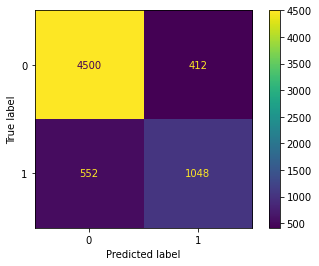

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_DT_pruned)

### Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(random_state=42)
RF_classifier.fit(x_train, y_train)
y_pred_RF = RF_classifier.predict(x_test)
RF_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [38]:
y_pred_RF_train = RF_classifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF))

Accuracy of the train set:  0.9999616093366094
Accuracy of the test set:  0.8551904176904177


Again, this is a case of overfitting. We perform Pre-pruning.

#### Pre-pruning Technique for Random Forest

Overfitting can be solved to a great extent by the hyperparameters 'max_depth' (how deep will we have our decision trees) and 'n_estimators' (number of decision trees in each layer).

In [39]:
parameters_grid = {
   "max_depth": [3, 5],
    "n_estimators": [200, 300]
}

grid_cv = GridSearchCV(RF_classifier, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train, y_train)

In [40]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(x_train)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(x_test)))

Parameters for Grid Search:  {'max_depth': 5, 'n_estimators': 200}
CV score for Grid Search:  0.9032115609914575
Train AUC-ROC Score for GS:  0.7381354570888031
Test AUC-ROC Score for GS:  0.7434486970684039


We use the parameters from GridSearchCV to train the Random Forest:

In [41]:
RF_classifier_pruned = RandomForestClassifier(n_estimators=300, max_depth=5)
RF_classifier_pruned.fit(x_train, y_train)
y_pred_RF_pruned = RF_classifier_pruned.predict(x_test)

In [42]:
y_pred_RF_pruned_train = RF_classifier_pruned.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_RF_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_RF_pruned))

Accuracy of the train set:  0.8540003071253072
Accuracy of the test set:  0.8511977886977887


The overfitting problem is now solved. We can evaluate the Performance of the model:

In [43]:
print(classification_report(y_test, y_pred_RF_pruned))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4912
           1       0.79      0.53      0.64      1600

    accuracy                           0.85      6512
   macro avg       0.83      0.74      0.77      6512
weighted avg       0.85      0.85      0.84      6512



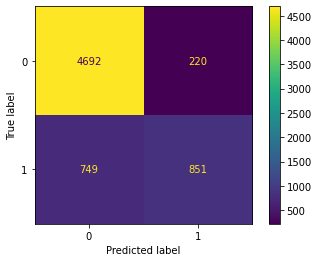

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RF_pruned)

### Stacking Classifier

In [45]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
base_est_svm = SVC()
base_est_gb = GradientBoostingClassifier(n_estimators=300, random_state=42)
base_est_rf = RandomForestClassifier(n_estimators=300, max_depth = 5, random_state=42)
base_est_dt = DecisionTreeClassifier(random_state=42, max_depth = 10, min_samples_leaf = 7, min_samples_split = 2)
estimators = [('RF', base_est_rf), ('GB', base_est_gb), ('DT', base_est_dt)]
StackClassifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
StackClassifier.get_params()

{'cv': 5,
 'estimators': [('RF',
   RandomForestClassifier(max_depth=5, n_estimators=300, random_state=42)),
  ('GB', GradientBoostingClassifier(n_estimators=300, random_state=42)),
  ('DT',
   DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, random_state=42))],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator__l1_ratio': None,
 'final_estimator__max_iter': 100,
 'final_estimator__multi_class': 'auto',
 'final_estimator__n_jobs': None,
 'final_estimator__penalty': 'l2',
 'final_estimator__random_state': None,
 'final_estimator__solver': 'lbfgs',
 'final_estimator__tol': 0.0001,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': LogisticRegression(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'RF': RandomForestClassifier(max_depth=5, n_estimators=300, 

In [46]:
StackClassifier.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('RF',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=300,
                                                       random_state=42)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=300,
                                                           random_state=42)),
                               ('DT',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=7,
                                                       random_state=42))],
                   final_estimator=LogisticRegression())

In [47]:
y_pred_Stack = StackClassifier.predict(x_test)

In [48]:
y_pred_Stack_train = StackClassifier.predict(x_train)
print('Accuracy of the train set: ', accuracy_score(y_train, y_pred_Stack_train))
print('Accuracy of the test set: ', accuracy_score(y_test, y_pred_Stack))

Accuracy of the train set:  0.8779944717444718
Accuracy of the test set:  0.870085995085995


In [49]:
print(classification_report(y_test, y_pred_Stack))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      4912
           1       0.78      0.66      0.71      1600

    accuracy                           0.87      6512
   macro avg       0.84      0.80      0.81      6512
weighted avg       0.87      0.87      0.87      6512



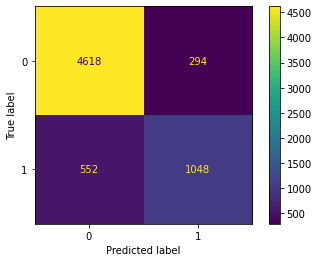

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_Stack)

## ROC Curve

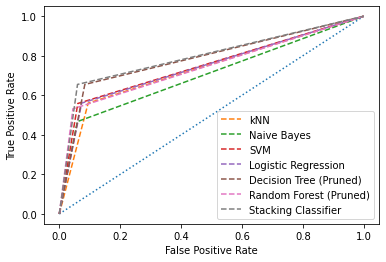

In [51]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr3, tpr3, '--', label='SVM')
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred_DT_pruned)
plt.plot(fpr5, tpr5, '--', label='Decision Tree (Pruned)')
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred_RF_pruned)
plt.plot(fpr6, tpr6, '--', label='Random Forest (Pruned)')
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred_Stack)
plt.plot(fpr7, tpr7, '--', label='Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

It seems that the Classifiers does not really do well when it comes to dealing with False Positives. However, in terms of accuracy, Stacking Classifier and Decision Tree tend to outperform other algorithms that we have implemented so far.

We have to tackle the Imbalance in the dataset in order to have a better ROC Curve.

# Tackling Imbalace in the dataset

We now analyze the performance of different algorithms after the dataset is balanced.

### Oversampling using ADASYN

In [52]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversampler = ADASYN()
X, Y = oversampler.fit_resample(x,y)
Counter(Y)

Counter({0: 24719, 1: 24850})

### Train and Test Sets

In [53]:
x_train_balanced, x_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X, Y, random_state=42, test_size=0.2)
print('Shape x_train: ', x_train_balanced.shape)
print('Shape y_train: ', y_train_balanced.shape)
print('Shape x_test: ', x_test_balanced.shape)
print('Shape y_test: ', y_test_balanced.shape)

Shape x_train:  (39655, 15)
Shape y_train:  (39655,)
Shape x_test:  (9914, 15)
Shape y_test:  (9914,)


### Standardization

In [54]:
scaler = StandardScaler()
scaler.fit(x_train_balanced)
x_train_balanced = scaler.transform(x_train_balanced)
x_test_balanced = scaler.transform(x_test_balanced)

### ML Techniques

#### k-Nearest Neighbours

In [55]:
kNN_classifier_balanced = KNeighborsClassifier()
kNN_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_kNN_balanced = kNN_classifier_balanced.predict(x_test_balanced)

In [56]:
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_kNN_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_kNN_balanced))

Accuracy of the train set:  0.9026352288488211
Accuracy of the test set:  0.8518257010288481


In [57]:
print(classification_report(y_test_balanced, y_pred_kNN_balanced))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4998
           1       0.84      0.87      0.85      4916

    accuracy                           0.85      9914
   macro avg       0.85      0.85      0.85      9914
weighted avg       0.85      0.85      0.85      9914



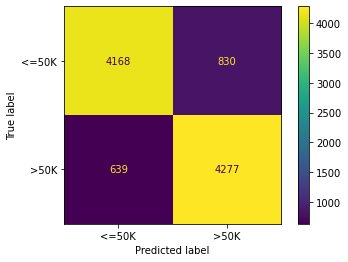

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, y_pred_kNN_balanced), display_labels=['<=50K', '>50K']).plot()

#### Naive Bayes

In [59]:
NB_classifier_balanced = GaussianNB()
NB_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_NB_balanced = NB_classifier_balanced.predict(x_test_balanced)

In [60]:
y_pred_NB_train_balanced = NB_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_NB_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_NB_balanced))

Accuracy of the train set:  0.7583911234396671
Accuracy of the test set:  0.7561024813395198


In [61]:
print(classification_report(y_test_balanced, y_pred_NB_balanced))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      4998
           1       0.78      0.71      0.74      4916

    accuracy                           0.76      9914
   macro avg       0.76      0.76      0.76      9914
weighted avg       0.76      0.76      0.76      9914



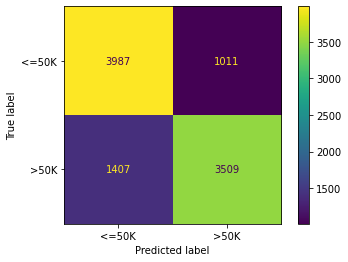

In [62]:
ConfusionMatrixDisplay(confusion_matrix(y_test_balanced, y_pred_NB_balanced), display_labels=['<=50K', '>50K']).plot()

#### Support Vector Machine

In [63]:
SVM_classifier_balanced = SVC()
SVM_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(x_test_balanced)

In [64]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_SVM_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_SVM_balanced))

Accuracy of the train set:  0.8686168200731308
Accuracy of the test set:  0.8619124470445834


In [65]:
print(classification_report(y_test_balanced, y_pred_SVM_balanced))

              precision    recall  f1-score   support

           0       0.90      0.81      0.86      4998
           1       0.83      0.91      0.87      4916

    accuracy                           0.86      9914
   macro avg       0.87      0.86      0.86      9914
weighted avg       0.87      0.86      0.86      9914



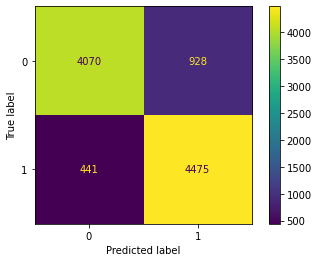

In [66]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_SVM_balanced)

#### Logistic Regression

In [67]:
LR_classifier_balanced = LogisticRegression()
LR_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_LR_balanced = LR_classifier_balanced.predict(x_test_balanced)

In [68]:
y_pred_LR_train_balanced = LR_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_LR_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_LR_balanced))

Accuracy of the train set:  0.8221409658302862
Accuracy of the test set:  0.8180351018761347


In [69]:
print(classification_report(y_test_balanced, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      4998
           1       0.78      0.89      0.83      4916

    accuracy                           0.82      9914
   macro avg       0.82      0.82      0.82      9914
weighted avg       0.82      0.82      0.82      9914



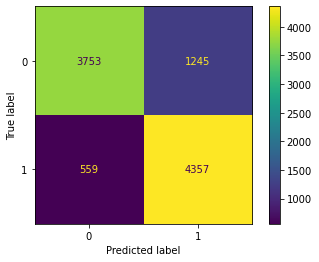

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_LR_balanced)

#### Decision Tree

In [71]:
DT_classifier_balanced = DecisionTreeClassifier()
DT_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_DT_balanced = DT_classifier_balanced.predict(x_test_balanced)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [72]:
y_pred_DT_train_balanced = DT_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_DT_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_DT_balanced))

Accuracy of the train set:  1.0
Accuracy of the test set:  0.8593907605406496


This is probably overfitting: we perform pre-pruning by oversampling.

##### Pre-pruning Technique for Decision Tree

In [73]:
parameters_grid = {
   "max_depth": [3, 5, 10, 15, 20, 25, 30],
    "min_samples_split": [2, 5, 7, 10, 12, 15],
    "min_samples_leaf": [1, 2, 5, 7] 
}

grid_cv = GridSearchCV(DT_classifier_balanced, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train_balanced,
                                                                                                        y_train_balanced)

In [74]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train_balanced, grid_cv.predict(x_train_balanced)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test_balanced, grid_cv.predict(x_test_balanced)))

Parameters for Grid Search:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 15}
CV score for Grid Search:  0.9399462068698914
Train AUC-ROC Score for GS:  0.874005189693302
Test AUC-ROC Score for GS:  0.8652534650963722


We use the values that have been suggested as optimal by the GridSearchCV:

In [75]:
DT_classifier_balanced_pruned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 15)
DT_classifier_balanced_pruned.fit(x_train_balanced, y_train_balanced)
y_pred_DT_balanced_pruned = DT_classifier_balanced_pruned.predict(x_test_balanced)

In [76]:
y_pred_DT_balanced_pruned_train = DT_classifier_balanced_pruned.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_DT_balanced_pruned_train))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_DT_balanced_pruned))

Accuracy of the train set:  0.8738872777707729
Accuracy of the test set:  0.8654428081500908


The problem of oversampling has been solved. We can now check the performance of the model:

In [77]:
print(classification_report(y_test_balanced, y_pred_DT_balanced_pruned))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4998
           1       0.87      0.85      0.86      4916

    accuracy                           0.87      9914
   macro avg       0.87      0.87      0.87      9914
weighted avg       0.87      0.87      0.87      9914



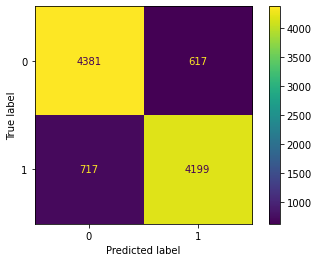

In [78]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_DT_balanced_pruned)

#### Random Forests

In [79]:
RF_classifier_balanced = RandomForestClassifier(random_state=42)
RF_classifier_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_RF_balanced = RF_classifier_balanced.predict(x_test_balanced)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [80]:
y_pred_RF_train_balanced = RF_classifier_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_RF_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_RF_balanced))

Accuracy of the train set:  0.9999747824990544
Accuracy of the test set:  0.8935848295339923


Overfitting exists here; we perform Pre-pruning.

##### Pre-pruning Technique for Random Forest

In [81]:
parameters_grid = {
    "max_depth": [10, 15, 20],
    "n_estimators": [400, 500]
}

grid_cv = GridSearchCV(RF_classifier_balanced, parameters_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(x_train_balanced,
                                                                                                        y_train_balanced)

In [82]:
print("Parameters for Grid Search: ", grid_cv.best_params_)
print("CV score for Grid Search: ", grid_cv.best_score_)
print("Train AUC-ROC Score for GS: ", roc_auc_score(y_train_balanced, grid_cv.predict(x_train_balanced)))
print("Test AUC-ROC Score for GS: ", roc_auc_score(y_test_balanced, grid_cv.predict(x_test_balanced)))

Parameters for Grid Search:  {'max_depth': 20, 'n_estimators': 500}
CV score for Grid Search:  0.9615148528763844
Train AUC-ROC Score for GS:  0.9542238385200648
Test AUC-ROC Score for GS:  0.8912908939002777


Using the values that were derived from GridSearchCV:

In [84]:
RF_classifier_pruned_balanced = RandomForestClassifier(n_estimators=500, max_depth=20)
RF_classifier_pruned_balanced.fit(x_train_balanced, y_train_balanced)
y_pred_RF_pruned_balanced = RF_classifier_pruned_balanced.predict(x_test_balanced)

In [85]:
y_pred_RF_pruned_train_balanced = RF_classifier_pruned_balanced.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_RF_pruned_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_RF_pruned_balanced))

Accuracy of the train set:  0.9540537132770143
Accuracy of the test set:  0.8892475287472261


There still may exist some small level of overfitting. However, we can let this be our optimal model (we could however further tune the hyperparameters and generate a better model) and evaluate its performance:

In [86]:
print(classification_report(y_test_balanced, y_pred_RF_pruned_balanced))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4998
           1       0.88      0.90      0.89      4916

    accuracy                           0.89      9914
   macro avg       0.89      0.89      0.89      9914
weighted avg       0.89      0.89      0.89      9914



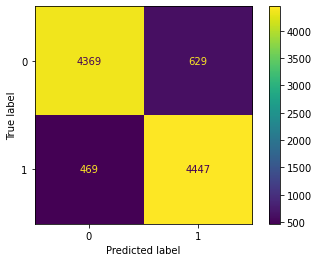

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_RF_pruned_balanced)

#### Stacking Classifier

We can use the parameters from Decision Tree and Random Forests in the Stacking Classifier:

In [88]:
base_est_gb = GradientBoostingClassifier(n_estimators=400, random_state=42)
base_est_rf = RandomForestClassifier(n_estimators=400, max_depth = 20, random_state=42)
base_est_dt = DecisionTreeClassifier(random_state=42, max_depth = 10, min_samples_leaf = 2, min_samples_split = 15)
estimators = [('RF', base_est_rf), ('GB', base_est_gb), ('DT', base_est_dt)]
StackClassifier = StackingClassifier(estimators=estimators, final_estimator= SVC(), cv=5)
StackClassifier.get_params()

{'cv': 5,
 'estimators': [('RF',
   RandomForestClassifier(max_depth=20, n_estimators=400, random_state=42)),
  ('GB', GradientBoostingClassifier(n_estimators=400, random_state=42)),
  ('DT',
   DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=15,
                          random_state=42))],
 'final_estimator__C': 1.0,
 'final_estimator__break_ties': False,
 'final_estimator__cache_size': 200,
 'final_estimator__class_weight': None,
 'final_estimator__coef0': 0.0,
 'final_estimator__decision_function_shape': 'ovr',
 'final_estimator__degree': 3,
 'final_estimator__gamma': 'scale',
 'final_estimator__kernel': 'rbf',
 'final_estimator__max_iter': -1,
 'final_estimator__probability': False,
 'final_estimator__random_state': None,
 'final_estimator__shrinking': True,
 'final_estimator__tol': 0.001,
 'final_estimator__verbose': False,
 'final_estimator': SVC(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'RF': RandomForestClass

In [89]:
StackClassifier.fit(x_train_balanced, y_train_balanced)

StackingClassifier(cv=5,
                   estimators=[('RF',
                                RandomForestClassifier(max_depth=20,
                                                       n_estimators=400,
                                                       random_state=42)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=400,
                                                           random_state=42)),
                               ('DT',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=15,
                                                       random_state=42))],
                   final_estimator=SVC())

In [90]:
y_pred_Stack_balanced = StackClassifier.predict(x_test_balanced)

In [91]:
y_pred_Stack_train_balanced = StackClassifier.predict(x_train_balanced)
print('Accuracy of the train set: ', accuracy_score(y_train_balanced, y_pred_Stack_train_balanced))
print('Accuracy of the test set: ', accuracy_score(y_test_balanced, y_pred_Stack_balanced))

Accuracy of the train set:  0.9273988147774556
Accuracy of the test set:  0.898325600161388


In [92]:
print(classification_report(y_test_balanced, y_pred_Stack_balanced))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4998
           1       0.90      0.89      0.90      4916

    accuracy                           0.90      9914
   macro avg       0.90      0.90      0.90      9914
weighted avg       0.90      0.90      0.90      9914



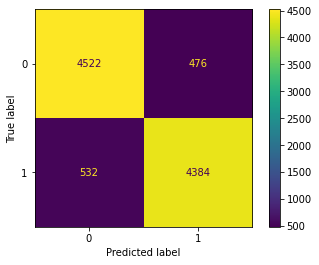

In [93]:
ConfusionMatrixDisplay.from_predictions(y_test_balanced, y_pred_Stack_balanced)

## ROC Curve

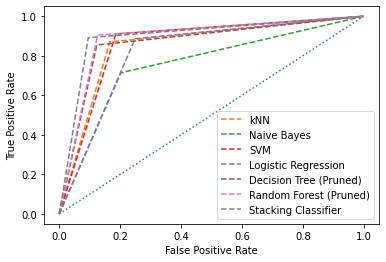

In [94]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test_balanced, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(y_test_balanced, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(y_test_balanced, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM')
fpr4, tpr4, thresholds = roc_curve(y_test_balanced, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(y_test_balanced, y_pred_DT_balanced_pruned)
plt.plot(fpr5, tpr5, '--', label='Decision Tree (Pruned)')
fpr6, tpr6, thresholds = roc_curve(y_test_balanced, y_pred_RF_pruned_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest (Pruned)')
fpr7, tpr7, thresholds = roc_curve(y_test_balanced, y_pred_Stack_balanced)
plt.plot(fpr7, tpr7, '--', label='Stacking Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

The ROC Curve looks much better now, after balancing the dataset, as opposed to before.

# The Overall ROC Curve

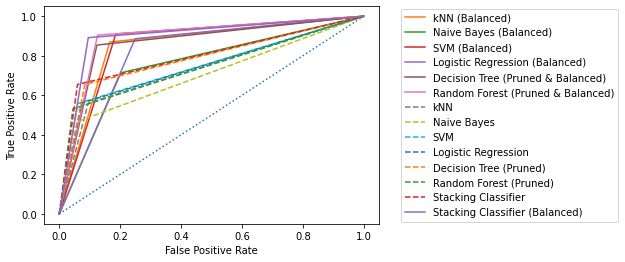

In [95]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(y_test_balanced, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '-', label='kNN (Balanced)')
fpr2, tpr2, thresholds = roc_curve(y_test_balanced, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '-', label='Naive Bayes (Balanced)')
fpr3, tpr3, thresholds = roc_curve(y_test_balanced, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '-', label='SVM (Balanced)')
fpr4, tpr4, thresholds = roc_curve(y_test_balanced, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '-', label='Logistic Regression (Balanced)')
fpr5, tpr5, thresholds = roc_curve(y_test_balanced, y_pred_DT_balanced_pruned)
plt.plot(fpr5, tpr5, '-', label='Decision Tree (Pruned & Balanced)')
fpr6, tpr6, thresholds = roc_curve(y_test_balanced, y_pred_RF_pruned_balanced)
plt.plot(fpr6, tpr6, '-', label='Random Forest (Pruned & Balanced)')
fpr7, tpr7, thresholds = roc_curve(y_test, y_pred_kNN)
plt.plot(fpr7, tpr7, '--', label='kNN')
fpr8, tpr8, thresholds = roc_curve(y_test, y_pred_NB)
plt.plot(fpr8, tpr8, '--', label='Naive Bayes')
fpr9, tpr9, thresholds = roc_curve(y_test, y_pred_SVM)
plt.plot(fpr9, tpr9, '--', label='SVM')
fpr10, tpr10, thresholds = roc_curve(y_test, y_pred_LR)
plt.plot(fpr10, tpr10, '--', label='Logistic Regression')
fpr11, tpr11, thresholds = roc_curve(y_test, y_pred_DT_pruned)
plt.plot(fpr11, tpr11, '--', label='Decision Tree (Pruned)')
fpr12, tpr12, thresholds = roc_curve(y_test, y_pred_RF_pruned)
plt.plot(fpr12, tpr12, '--', label='Random Forest (Pruned)')
fpr13, tpr13, thresholds = roc_curve(y_test, y_pred_Stack)
plt.plot(fpr13, tpr13, '--', label='Stacking Classifier')
fpr14, tpr14, thresholds = roc_curve(y_test_balanced, y_pred_Stack_balanced)
plt.plot(fpr14, tpr14, '-', label='Stacking Classifier (Balanced)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

# Conclusion

We have demonstrated with this model that the ROC Curve and therefore the rate of true positives could be improved by balancing the dataset. 

In this particular dataset, the stacking classifier consisting of the three best individual classifiers performs the best, followed by the Random Forest Classifier.

# Notes

1. AdaBoost, a Boosting algorithm, may perform considerably as good as Random Forest and Stacking Classifier. This algorithm has not been implemented on this dataset.
2. The aim of this notebook is to demonstrate that balancing the dataset can help achieve a better true positive rate, therby improvving the classifier. As such, a detailed analysis of individual algorithms have not been provided.